In [1]:
from ml.DecisionTree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/car/train.csv', names=['buying', 'maint', 'doors', 'persons' , 'lug_boot' , 'safety', 'label'])
df.head()

,buying,maint,doors,persons,lug_boot,safety,label
0,low,vhigh,4,4,big,med,acc
1,low,high,5more,4,med,high,vgood
2,vhigh,med,2,2,big,high,unacc
3,high,high,2,2,small,high,unacc
4,vhigh,low,3,2,big,low,unacc


In [3]:
df_test = pd.read_csv('./data/car/test.csv', names=['buying', 'maint', 'doors', 'persons' , 'lug_boot' , 'safety', 'label'])
df_test.head()

,buying,maint,doors,persons,lug_boot,safety,label
0,vhigh,high,5more,2,small,low,unacc
1,low,low,5more,2,small,med,unacc
2,low,vhigh,4,2,med,low,unacc
3,high,vhigh,3,4,med,med,unacc
4,vhigh,low,4,4,med,low,unacc


In [4]:
model = DecisionTreeClassifier()

In [5]:
model.fit(df, heuristic='entropy', max_depth=3)

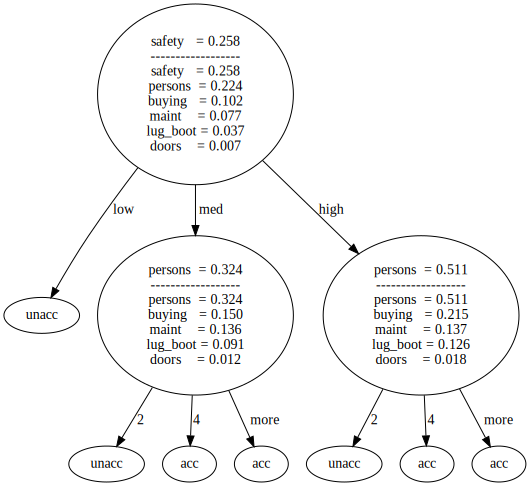

In [6]:
model.gen_tree()

In [7]:
report = {
    'training': {
        'depth':          [],
        'entropy':        [],
        'gini_index':     [],
        'majority_error': [],
    },
    'test': {
        'depth':          [],
        'entropy':        [],
        'gini_index':     [],
        'majority_error': [],
    },
}

depth_lo, depth_hi = 1, 7

for depth in range(depth_lo, depth_hi):
    report['training']['depth'].append(depth)
    report['test']['depth'].append(depth)
    for heuristic in ['entropy', 'gini_index', 'majority_error']:
        model.fit(df, heuristic=heuristic, max_depth=depth)

        predictions = model.predict_batch(df)
        report['training'][heuristic].append((100*sum(df['label'] == predictions)/len(df)))

        predictions = model.predict_batch(df_test)
        report['test'][heuristic].append((100*sum(df_test['label'] == predictions)/len(df_test)))

In [8]:
pd.DataFrame.from_dict(report['training'])

,depth,entropy,gini_index,majority_error
0,1,69.8,69.8,69.8
1,2,69.8,69.8,69.8
2,3,77.8,77.8,70.8
3,4,81.9,82.4,82.1
4,5,91.8,91.1,90.4
5,6,97.3,97.3,97.1


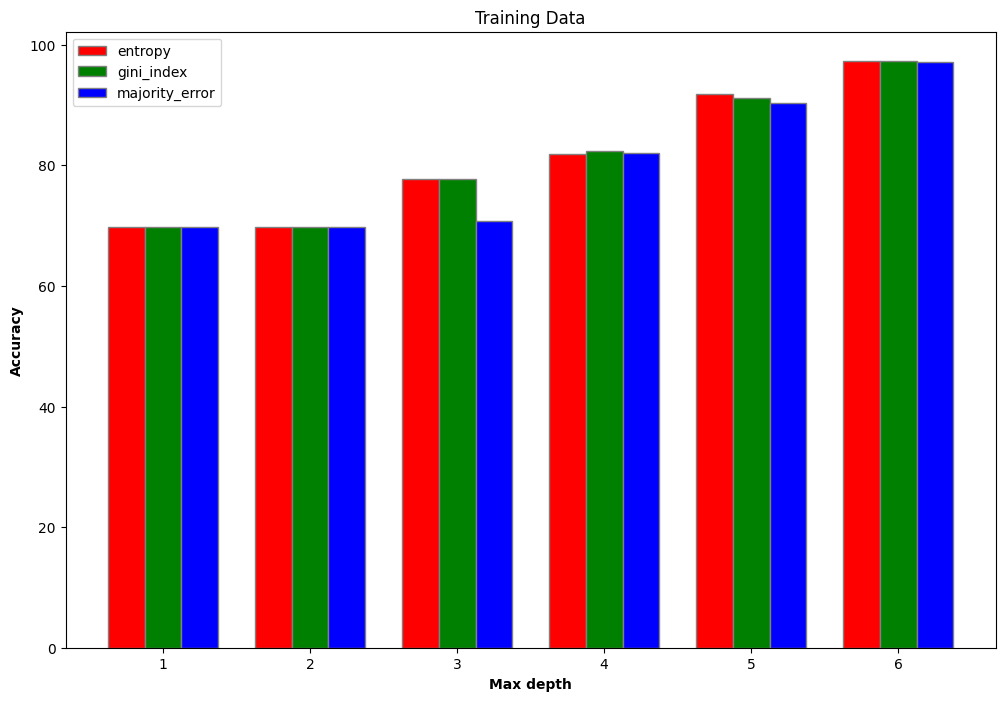

In [9]:
# set width of bar
bar_width = 0.25
fig = plt.subplots(figsize=(12, 8))

br1 = np.arange(depth_hi-depth_lo)
br2 = [x + bar_width for x in br1]
br3 = [x + bar_width for x in br2]

plt.bar(br1, report['training']['entropy'],        color ='r', width = bar_width, edgecolor ='grey', label ='entropy')
plt.bar(br2, report['training']['gini_index'],     color ='g', width = bar_width, edgecolor ='grey', label ='gini_index')
plt.bar(br3, report['training']['majority_error'], color ='b', width = bar_width, edgecolor ='grey', label ='majority_error')

plt.xlabel('Max depth', fontweight ='bold')
plt.ylabel('Accuracy', fontweight ='bold')
plt.xticks([r + bar_width for r in range(depth_hi-depth_lo)], [_ for _ in range(depth_lo, depth_hi)])
plt.title('Training Data')

plt.legend()
plt.show()

In [10]:
pd.DataFrame.from_dict(report['test'])

,depth,entropy,gini_index,majority_error
0,1,70.329670,70.329670,70.329670
1,2,70.329670,70.329670,70.329670
2,3,77.747253,77.747253,68.681319
3,4,80.357143,81.593407,80.906593
4,5,84.890110,86.263736,82.967033
5,6,91.620879,91.620879,90.659341


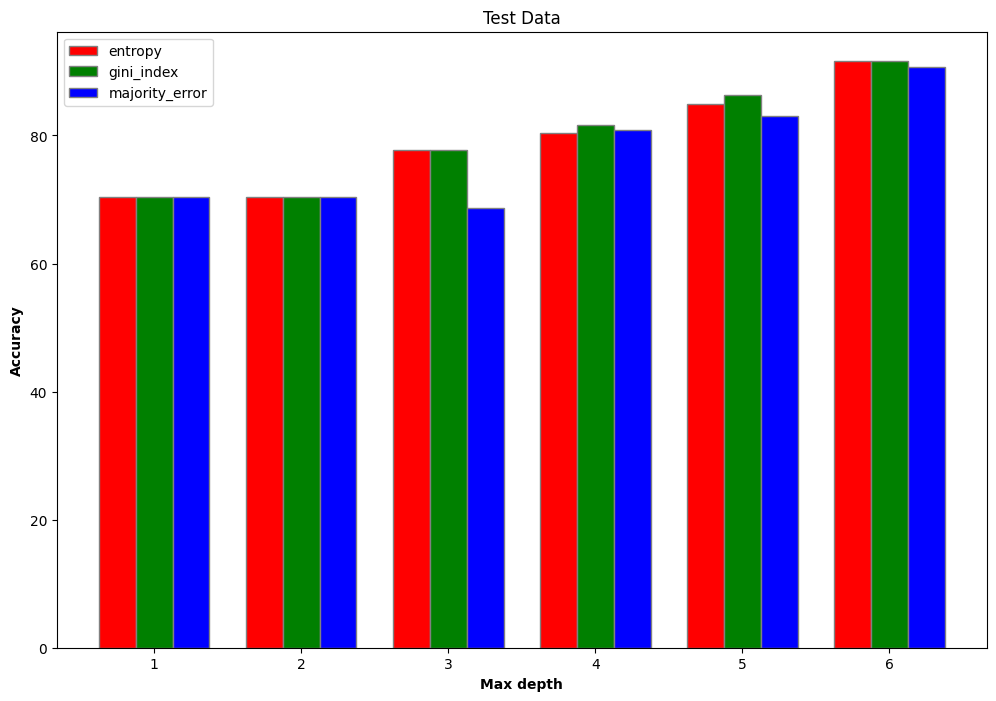

In [11]:
# set width of bar
bar_width = 0.25
fig = plt.subplots(figsize =(12, 8))

br1 = np.arange(depth_hi-depth_lo)
br2 = [x + bar_width for x in br1]
br3 = [x + bar_width for x in br2]

plt.bar(br1, report['test']['entropy'],        color ='r', width = bar_width, edgecolor ='grey', label ='entropy')
plt.bar(br2, report['test']['gini_index'],     color ='g', width = bar_width, edgecolor ='grey', label ='gini_index')
plt.bar(br3, report['test']['majority_error'], color ='b', width = bar_width, edgecolor ='grey', label ='majority_error')

plt.xlabel('Max depth', fontweight ='bold')
plt.ylabel('Accuracy', fontweight ='bold')
plt.xticks([r + bar_width for r in range(depth_hi-depth_lo)], [_ for _ in range(depth_lo, depth_hi)])
plt.title('Test Data')

plt.legend()
plt.show()